In [1]:
import os, sys
os.chdir(os.path.abspath('..'))

In [2]:
import json
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.linalg import block_diag
sns.set_theme(style="darkgrid")

In [3]:
%load_ext autoreload
%autoreload 2

import src.utils as utils
import src.preprocess_lib as preprocess_lib

In [6]:
autoregressive_file = 'runs/autoregressive_forecast/gipuzkoa/sweep_Mar28_13-27-53/test_results_raw.csv'
imputation_file = 'runs/imputation_forecast/gipuzkoa/sweep_Mar26_12-01-37/forecasting_results_24/test_results_raw.csv'

In [7]:
df_autoregressive = pd.read_csv(autoregressive_file)
df_imputation = pd.read_csv(imputation_file)

In [10]:
loglikelihoods_auto = df_autoregressive[df_autoregressive["set_type"]=="test"]["loglikelihood"].values
loglikelihoods_imputation = df_imputation[df_imputation["set_type"]=="test"]["loglikelihood"].values

Text(0, 0.5, 'Imputation log-likelihood')

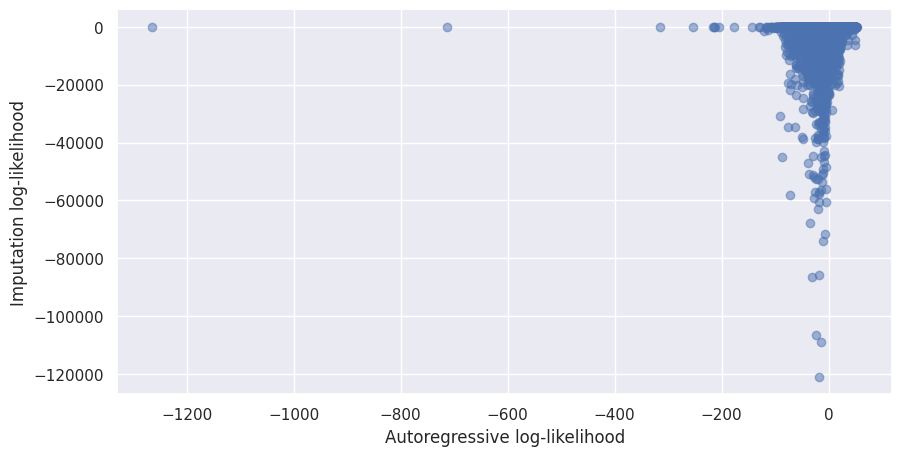

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(loglikelihoods_auto, loglikelihoods_imputation, alpha=0.5)
plt.xlabel("Autoregressive log-likelihood")
plt.ylabel("Imputation log-likelihood")

In [16]:
df_imputation.iloc[df_imputation["loglikelihood"].argmin()]

loglikelihood   -120976.805
user_id                3533
month                     5
set_type               test
Name: 257952, dtype: object

In [17]:
df_autoregressive.iloc[df_imputation["loglikelihood"].argmin()]

loglikelihood   -17.844479
user_id               3533
month                    5
set_type              test
Name: 257952, dtype: object